## Get to know the networkx-library

### Basic

In [1]:
import networkx as nx

In [146]:
# Initializes a graph
G = nx.Graph()

# Manually setting vertices, edges ...
G.add_node('Y')
G.add_node('Z')
G.add_edge('Y','Z')

# We can clear the existing structure
G.clear()
G.number_of_nodes(), G.number_of_edges()

In [149]:
# Or set multiple at once
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edges_from([('A','B'), ('C','E'), ('E','B'), ('D','A'), ('D','B'), ('C','D')])

G.add_node('ONE') # One vertice: ONE
G.add_nodes_from('ONE') # 3 vertices

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

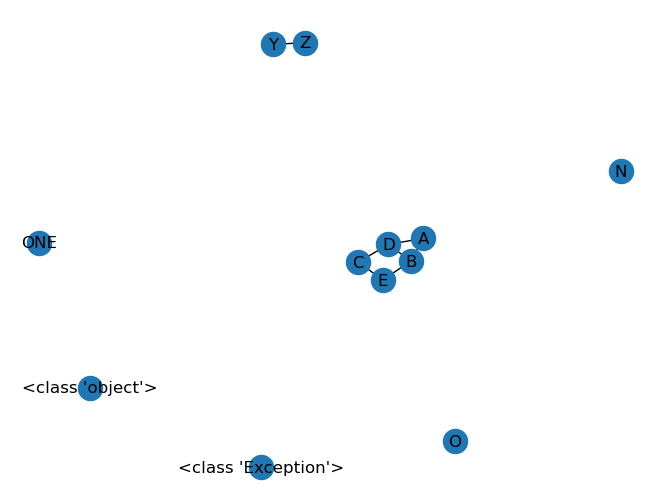

In [213]:
# We can set any object (hashable) as vertex in networkx

G.add_node(object)
G.add_node(Exception)

nx.draw(G,with_labels='True')

# Use convert_node_labels_to_integers() for easy and safe conversion

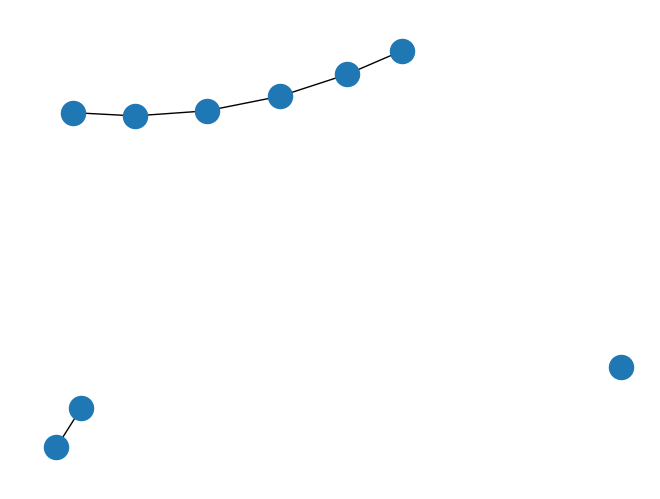

In [204]:
# Creates a 'line graph' with max 2 edges on one node
H = nx.path_graph(10)
H.remove_node(2)
H.remove_edge(3,4)
nx.draw(H)

In [218]:
# Edges can have attributes
G['Y']['Z']['color'] = 'yellow'
G['A']['B']['weight'] = '42'

In [221]:
# Regarding weights ...
G.clear()
G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [225]:
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [222]:
# This shows all elements of the graph
G.edges, G.nodes

(EdgeView([(1, 2), (1, 3), (2, 4), (3, 4)]), NodeView((1, 2, 3, 4)))

In [223]:
G.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

### Larger graphs

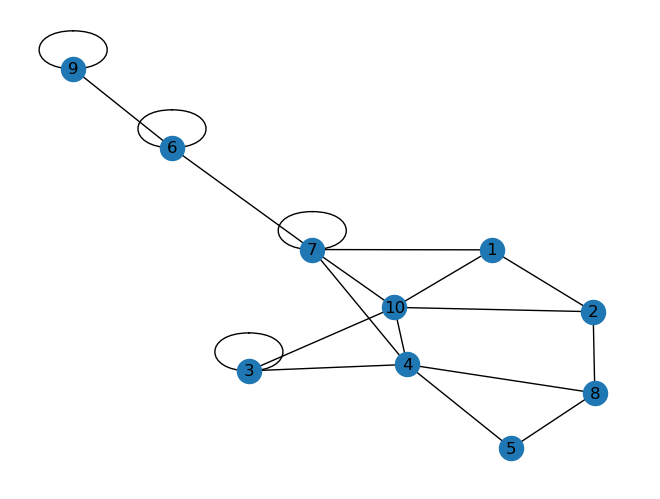

In [8]:
# Lets be more dingue
import random

G2 = nx.Graph()
nodes = [str(i) for i in range(1, 11)]
G2.add_nodes_from(nodes)

num_edges=len(nodes)*2
edges_indices=[]
for i in range(num_edges):
    p1=random.sample(nodes,k=1) # This is to allow for self directed egdes
    p2=random.sample(nodes,k=1)
    edges_indices.append((p1[0],p2[0]))
G2.add_edges_from(edges_indices)

nx.draw(G2, with_labels='True')

### Reading in data and creating graphs of them

In [9]:
import pandas as pd

file_path = '/Users/inuit/Documents/Gitrepos/GraphTheory/Data/Districts of Gujarat.xlsx'

# Use pandas to read the Excel file
sheet_name = 'Sheet3' 
# Use pandas to read the specified sheet from the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head(10)

,Districts,Ahmedabad,Amreli,Anand,Aravalli,Banaskantha,Bharuch,Bhavnagar,Botad,Chhota Udaipur,...,Panchmahal,Patan,Porbandar,Rajkot,Sabarkantha,Surat,Surendranagar,Tapi,Vadodara,Valsad
0,Ahmedabad,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,Amreli,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Anand,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Aravalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Banaskantha,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,Bharuch,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,Bhavnagar,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Botad,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
8,Chhota Udaipur,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,Dahod,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [196]:
G3 = nx.Graph()

In [197]:
values = []

for label, value in df.items():
    values.append(df[label].values)

names = values.pop(0)

assert(len(values) == len(names))

In [198]:
edges = []

for indice, i in enumerate(names):
    pairs = [(i, name) for value, name in zip(values[indice], names) if value == 1]
    edges.append(pairs)

In [199]:
for e in edges:
    G3.add_edges_from(e)

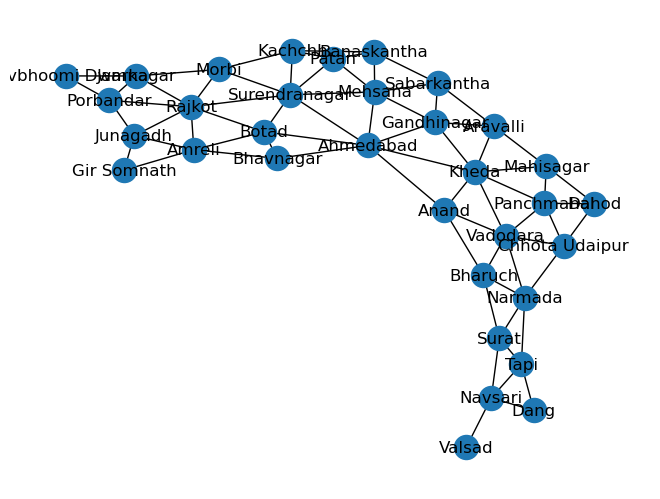

In [200]:
nx.draw(G3, with_labels='True')

In [201]:
G3.adj['Tapi'], G3.degree['Tapi']

(AtlasView({'Dang': {}, 'Narmada': {}, 'Navsari': {}, 'Surat': {}}), 4)